In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.model_selection import cross_val_score
from graphviz import Source
from pydotplus import graph_from_dot_data
from sklearn.metrics import r2_score

In [2]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X[:, 0], y, test_size=0.25)

In [3]:
regressor = DecisionTreeRegressor(max_depth=4)
regressor = regressor.fit(X_train.reshape(-1, 1), y_train)
cross_val_score(regressor, X_train.reshape(-1, 1), y_train)

array([0.49014455, 0.46222896, 0.4813592 , 0.48321242, 0.47999266])

In [4]:
y_pred = regressor.predict(X_test.reshape(-1, 1))
r2_score(y_test, y_pred)

0.5034501903216844

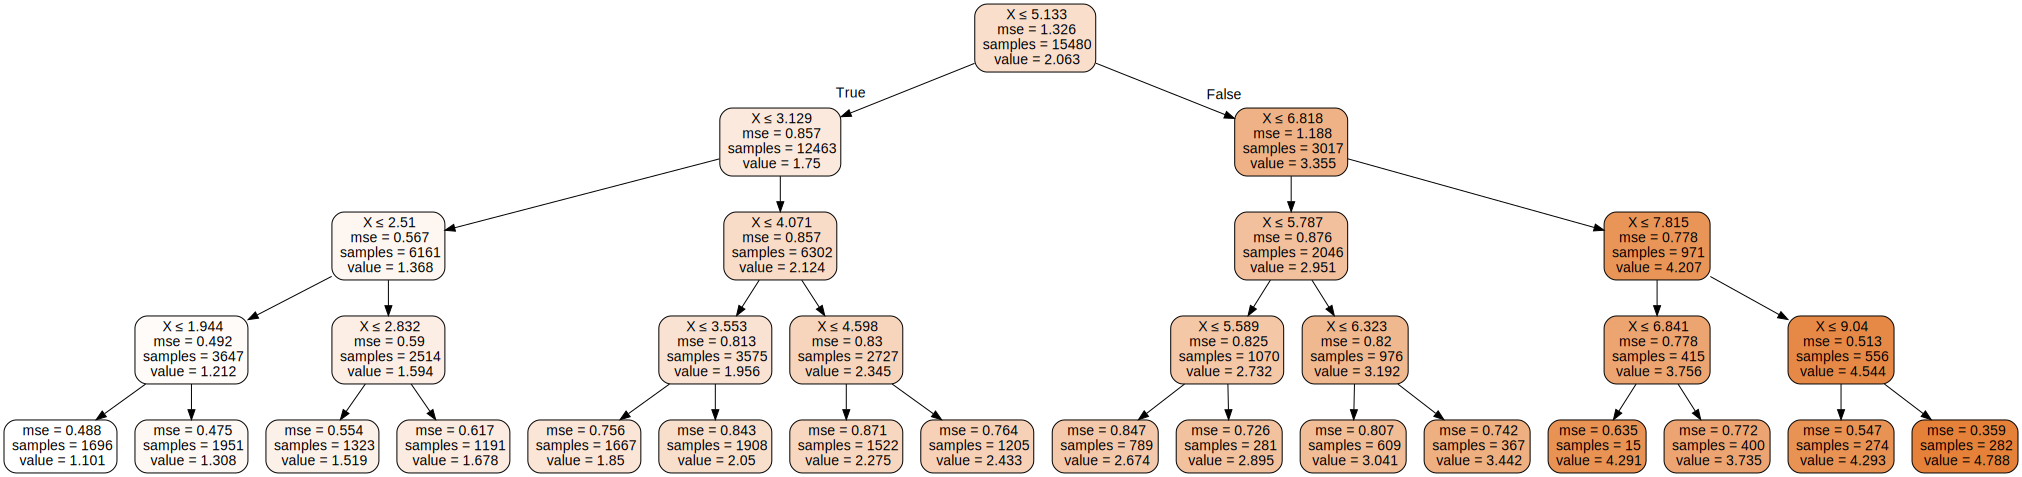

In [5]:
dot_data = export_graphviz(regressor, out_file=None, feature_names='X', class_names='Y', filled=True, rounded=True, special_characters=True)
graph = graph_from_dot_data(dot_data)
graph.write_pdf("regressor2.pdf")
Source(dot_data)